ITER=05000, RMSE=0.1770
ITER=10000, RMSE=0.1147
ITER=15000, RMSE=0.0693
ITER=20000, RMSE=0.0463
ITER=25000, RMSE=0.0344
ITER=30000, RMSE=0.0282
ITER=35000, RMSE=0.0251
ITER=40000, RMSE=0.0237
ITER=45000, RMSE=0.0225
ITER=50000, RMSE=0.0214


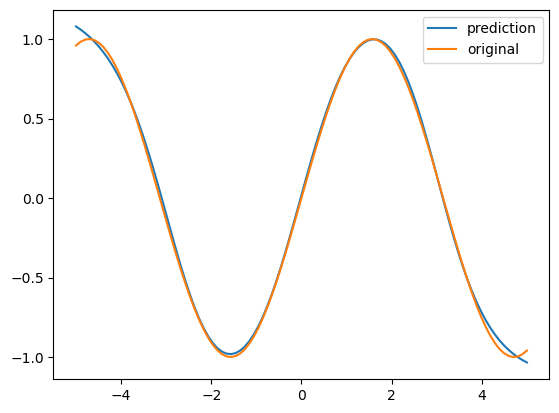

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MLP(object):
    """
    Using Keras and tensorflow, it is easy to learn. 
    However, it is implemented by using only numpy for feed forward and back propagation.

    Args:
        layers : [xs_dim, node, ... , node, out_dim]    

    mr.xeros@gmail.com [roadk]
    """
    
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.power(np.e, -x))

    @staticmethod
    def identity(x):
        return x

    @staticmethod
    def inv_sig(x):
        tmp = MLP.sigmoid(x)
        return tmp*(1-tmp)

    def __init__(self, **kwargs):


        self.layers = kwargs['layers']
        self.activate = [MLP.identity]
        self.weights = [1]
        self.bias = [0]
        self.lr = 0.002

        for i in range(1, len(self.layers)):
            self.weights.append(np.random.normal(0, 0.5, (self.layers[i-1],self.layers[i])))
            self.bias.append(np.random.normal(0, 0.5, self.layers[i]))

            if i != len(self.layers) -1:
                self.activate.append(MLP.sigmoid)
            else:
                self.activate.append(MLP.identity)

    def feed_forward(self, xs):

        self.U = [xs]
        self.Z = [xs]

        for i in range(1, len(self.layers)):
            u = self.Z[i-1].dot(self.weights[i]) + self.bias[i]
            z = self.activate[i](u)
            self.U.append(u)
            self.Z.append(z)

        return self.Z[-1]


    def back_propagate(self, xs, ys):

        pred_ys = self.feed_forward(xs)
        self.D = []

        for i in reversed(range(1,len(self.layers))):
            if i == len(self.layers) - 1:
                d = pred_ys - ys
            else:
                d = self.inv_sig(self.U[i])*(self.D[-1].dot(self.weights[i+1].T))

            dW = self.Z[i-1].T.dot(d)
            db = np.sum(d, axis=0)

            self.weights[i] -= self.lr*dW
            self.bias[i] -= self.lr*db

            self.D.append(d)
        return

    def evaluate(self, xs, ys):
        pred_ys = self.feed_forward(xs)
        d = pred_ys - ys
        return np.mean(np.sqrt(d**2))
    

# if __name__ == '__main__':
    
#     model = MLP(layers=[1,5,5,5,1])
    
#     train_x = np.linspace(-5,5,100)
#     train_y = np.sin(train_x)

#     xs = train_x.reshape(-1,1)
#     ys = train_y.reshape(-1,1)

#     pred_ys = model.feed_forward(xs)

#     for i in range(50000):
#         model.back_propagate(xs, ys)

#         if (i+1) % 5000 == 0:
#             error = model.evaluate(xs, ys)
#             print('ITER={:05d}, RMSE={:.4f}'.format(i+1, error))
            
#     pred_ys = model.feed_forward(xs)
    
#     plt.plot(xs.ravel(), pred_ys.ravel(), label='prediction')
#     plt.plot(xs.ravel(), train_y.ravel(), label='original')
#     plt.legend()    
            